**Model Creaton and Predictions**


📌 Predicted XNOR Outputs (after training):

 Input 1    Input 2     Predicted Output  
----------------------------------------
    0          0             0.945        
    0          1             0.051        
    1          0             0.050        
    1          1             0.946        


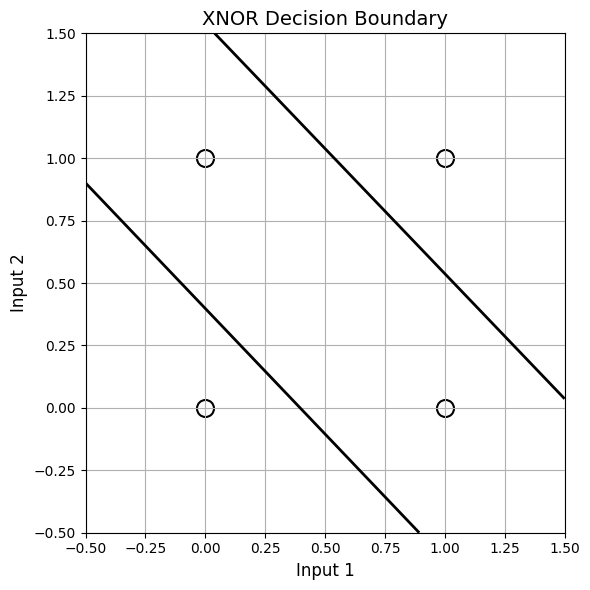

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

# XNOR inputs and expected outputs
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[1],[0],[0],[1]])

# Random weight initialization
np.random.seed(42)
input_size = 2
hidden_size = 2
output_size = 1

wh = np.random.uniform(size=(input_size, hidden_size))
bh = np.random.uniform(size=(1, hidden_size))
wo = np.random.uniform(size=(hidden_size, output_size))
bo = np.random.uniform(size=(1, output_size))

# Train the model
lr = 0.1
for epoch in range(10000):
    # Forward pass
    hidden_input = np.dot(X, wh) + bh
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, wo) + bo
    output = sigmoid(final_input)

    # Backward pass
    error = y - output
    d_output = error * sigmoid_derivative(output)

    error_hidden = d_output.dot(wo.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    wo += hidden_output.T.dot(d_output) * lr
    bo += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X.T.dot(d_hidden) * lr
    bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Final predictions
print("\n📌 Predicted XNOR Outputs (after training):\n")
print(f"{'Input 1':^10} {'Input 2':^10} {'Predicted Output':^20}")
print("-" * 40)
for i in range(len(X)):
    print(f"{X[i][0]:^10} {X[i][1]:^10} {output[i][0]:^20.3f}")


# Plot The Straight Lines
# Meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                     np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on mesh
hidden_layer = sigmoid(np.dot(grid, wh) + bh)
preds = sigmoid(np.dot(hidden_layer, wo) + bo)
preds = preds.reshape(xx.shape)

# Plot
plt.figure(figsize=(6,6))

# Only draw decision boundary (0.5 level), no labels
plt.contour(xx, yy, preds, levels=[0.5], colors='black', linewidths=2)

# Plot XNOR input points
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolors='black', s=150, linewidths=1.5, marker='o')

# Plot settings
plt.title("XNOR Decision Boundary", fontsize=14)
plt.xlabel("Input 1", fontsize=12)
plt.ylabel("Input 2", fontsize=12)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.tight_layout()
plt.show()